In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [2]:
data = pd.read_csv("digikala_dataset/digikala-orders.csv")
data.head()

In [4]:
data['DateTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'])
data['InvoiceYearMonth'] = data['DateTime_CartFinalize'].map(lambda date: 100*date.year + date.month)
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,InvoiceYearMonth
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605


In [5]:
data_year_month = data.groupby(['InvoiceYearMonth'])['ID_Order'].count().reset_index()
data_year_month.head()

,InvoiceYearMonth,ID_Order
0,201309,6
1,201310,73
2,201311,90
3,201312,116
4,201401,141


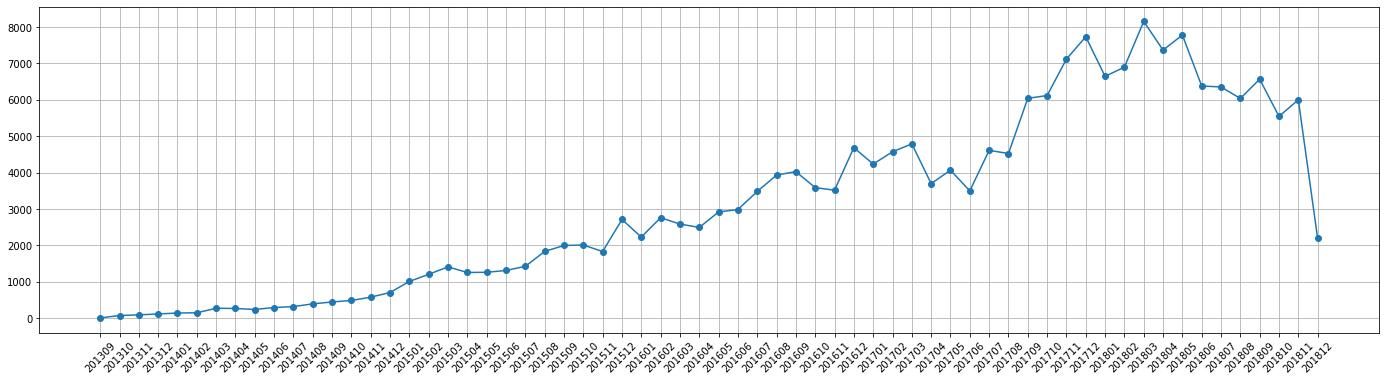

In [6]:
plt.figure(figsize=(24, 6))
plt.plot(data_year_month['InvoiceYearMonth'].to_numpy(dtype='str'), data_year_month['ID_Order'], marker='o')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [7]:
data_city = data.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()
data_city.head()

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2


In [8]:
result = data_city.sort_values('ID_Customer', ascending=False)[:8]
s = data_city.sort_values('ID_Customer', ascending=False)[8:]['ID_Customer'].sum()
result.loc[len(result)]=['Others', s]
result.head(10)

,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353
505,شیراز,3076
355,رشت,2414
202,تبریز,2075
8,Others,47647


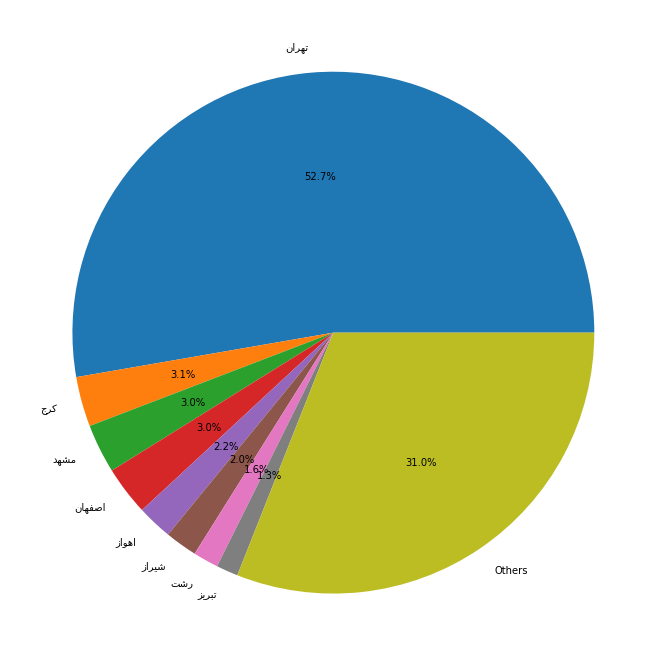

In [9]:
persian_labels = [get_display(reshape(label)) for label in result['city_name_fa'].to_numpy(dtype='str')]

plt.figure(figsize=(12, 12))
plt.pie(result['ID_Customer'], labels=persian_labels, autopct='%1.1f%%')
plt.show()